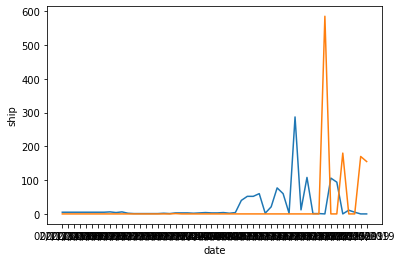

In [48]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

file_start = r"C:\Users\mkreidler\Desktop\start.xlsx"
file_stop = r"C:\Users\mkreidler\Desktop\stop.xlsx"

start = pd.read_excel(file_start)
ship = pd.read_excel(file_stop)

# put in order so you can cumulative count after
start = start.sort_values(["date"])
start["instance"] = start.groupby("start").cumcount()
start = start.loc[start.instance == 0, ["start", "date"]]  #filters only the first occurence



start = start.groupby("date").count().reset_index()
ship = ship.groupby("date").count().reset_index()

merge = start.merge(ship, on="date", how="outer").fillna(0).sort_values("date")

def format_date(x):
    if x == 0:
        x = 20191225
    date = datetime.strptime(str(x), '%Y%m%d').strftime('%m/%d/%Y')
    return date
merge.date = merge.date.apply(format_date)
merge = merge.sort_values("date")

merge



#merge.to_excel(r"C:\Users\mkreidler\Desktop\depaul.xlsx")

ax = sns.lineplot(x=merge.date, y=merge.start, palette="ch:2.5,.25")
ax = sns.lineplot(x=merge.date, y=merge.ship)
#plt.plot(merge.date, merge.start)
#plt.plot(merge.date, merge.ship)
plt.show()


In [39]:
merge

,date,start,ship
0,02/11/2019,5.0,0.0
1,02/12/2019,5.0,0.0
2,02/13/2019,5.0,0.0
3,02/14/2019,5.0,0.0
4,02/15/2019,5.0,0.0
5,02/18/2019,5.0,0.0
6,02/19/2019,5.0,0.0
7,02/20/2019,5.0,0.0
8,02/21/2019,6.0,0.0
9,02/22/2019,4.0,0.0
